In [17]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import ARMA

In [8]:
# copied from pre_processing.ipynb
def extract_by_value(data, column, value):
    """ Return the data with given value in the specified column
    """
    if not column in data.columns:
        raise ValueError('The column name is incorrect!')
    return data[data[column] == value]

In [5]:
# Load market training data
market_train = pd.read_csv("./market_train_df.csv")

In [28]:
market_train.head()

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0


In [9]:
# take Apple Inc as an example
apple_ts = extract_by_value(market_train, 'assetCode', 'AAPL.O')[['time', 'returnsOpenPrevMktres1', 'volume']]
apple_ts = apple_ts[1:]
apple_ts

,time,returnsOpenPrevMktres1,volume
1421,2007-02-02 22:00:00+00:00,-0.026983,22212416.0
2844,2007-02-05 22:00:00+00:00,0.001477,20737742.0
4272,2007-02-06 22:00:00+00:00,0.002135,30893975.0
5702,2007-02-07 22:00:00+00:00,0.000392,38180972.0
7134,2007-02-08 22:00:00+00:00,0.010226,24264750.0
8562,2007-02-09 22:00:00+00:00,0.006735,30756328.0
9994,2007-02-12 22:00:00+00:00,-0.009432,25873256.0
11428,2007-02-13 22:00:00+00:00,0.012093,21250545.0
12860,2007-02-14 22:00:00+00:00,-0.012470,18150679.0
14293,2007-02-15 22:00:00+00:00,0.000738,12997017.0


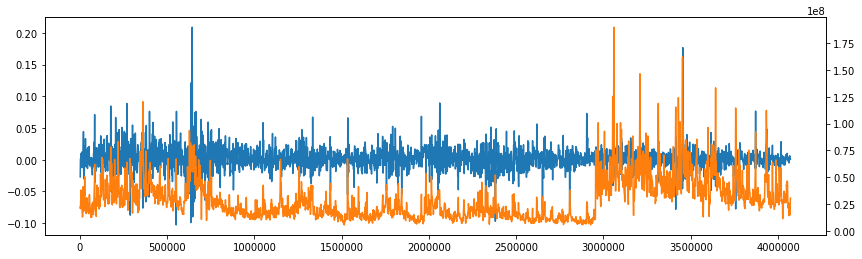

In [34]:
# plot the time series of apple returns & volume
plt.subplots(figsize = (14,4))
plt.plot(apple_ts.returnsOpenPrevMktres1)
apple_ts.volume.plot(secondary_y = True)

In [10]:
# check the mean return of apple
apple_return = apple_ts.returnsOpenPrevMktres1
np.mean(apple_return)

0.0010911192043861534

In [35]:
# AD Fuller test: apple_return series is stationary, no unit root present
from statsmodels.tsa.stattools import adfuller
adfuller(apple_return)

(-24.293481637168824,
 0.0,
 3,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 -12533.7898679938)

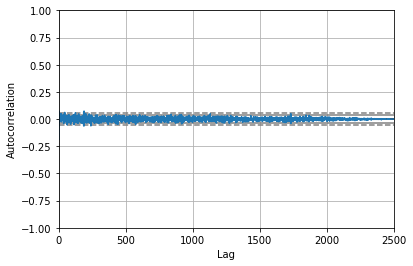

In [24]:
# Autocorrelation function: no autocorrelation exists
autocorrelation_plot(apple_return)

In [ ]:
# find the best parameters for the ARIMA model using AIC criteria
def best_ARMA(df, lower, upper):
    arg_AR, arg_MA = np.arange(lower, upper), np.arange(lower, upper)
    best_param_AR, best_param_MA = 0, 0
    tmp = 10000000
    rs = 99
    for i in arg_AR:
        for j in arg_MA:
            model = ARMA(df, order = (i, 0, j))
            

In [14]:
# fit model ARIMA(1,0,1)
model = ARIMA(apple_return, order = (5, 0, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                ARMA Model Results                                
Dep. Variable:     returnsOpenPrevMktres1   No. Observations:                 2497
Model:                         ARMA(5, 1)   Log Likelihood                6347.762
Method:                           css-mle   S.D. of innovations              0.019
Date:                    Sat, 08 Dec 2018   AIC                         -12679.523
Time:                            13:02:16   BIC                         -12632.941
Sample:                                 0   HQIC                        -12662.611
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0011      0.000      3.223      0.001       0.000       0.002
ar.L1.returnsOpenPrevMktres1     0.3569      

                 0
count  2497.000000
mean     -0.000001
std       0.019046
min      -0.106754
25%      -0.009222
50%      -0.000476
75%       0.009376
max       0.197998


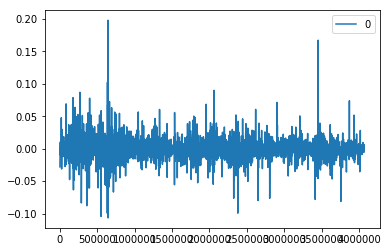

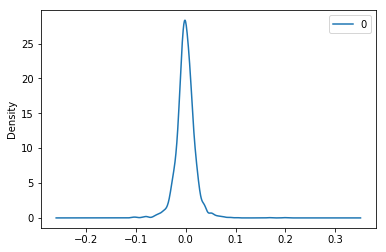

In [15]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind = 'kde')
print(residuals.describe())

predicted=0.000519, expected=0.013754
predicted=-0.000545, expected=-0.013797
predicted=0.004544, expected=0.005690
predicted=-0.000481, expected=-0.006705
predicted=0.003298, expected=-0.004654
predicted=0.001699, expected=-0.003008
predicted=0.001934, expected=-0.013305
predicted=0.003618, expected=0.010232
predicted=-0.000984, expected=-0.002089
predicted=0.002647, expected=0.003692
predicted=0.000462, expected=0.011479
predicted=-0.000158, expected=-0.004818
predicted=0.002852, expected=-0.005319
predicted=0.001950, expected=0.012866
predicted=-0.000886, expected=-0.003518
predicted=0.002863, expected=-0.078109
predicted=0.014452, expected=0.002405
predicted=-0.003181, expected=0.003250
predicted=0.002353, expected=-0.018585
predicted=0.004335, expected=-0.028948
predicted=0.005392, expected=0.034608
predicted=-0.005794, expected=0.007706
predicted=0.002396, expected=0.017670
predicted=-0.001904, expected=0.037115
predicted=-0.003786, expected=-0.001300
predicted=0.003358, expected

predicted=0.002622, expected=-0.005568
predicted=0.001979, expected=0.003338
predicted=0.000711, expected=-0.004231
predicted=0.002351, expected=0.006615
predicted=0.000054, expected=0.012191
predicted=-0.000143, expected=0.014430
predicted=-0.000436, expected=-0.001816
predicted=0.002331, expected=-0.003070
predicted=0.001670, expected=0.001096
predicted=0.001190, expected=0.023594
predicted=-0.002349, expected=-0.004152
predicted=0.003323, expected=-0.018285
predicted=0.003873, expected=0.017631
predicted=-0.002210, expected=0.003891
predicted=0.001933, expected=0.009409
predicted=-0.000244, expected=0.001831
predicted=0.001679, expected=-0.020143
predicted=0.004701, expected=-0.009909
predicted=0.002068, expected=0.008034
predicted=-0.000075, expected=-0.002699
predicted=0.002349, expected=0.003326
predicted=0.000614, expected=0.015647
predicted=-0.000874, expected=-0.000342
predicted=0.002216, expected=0.012784
predicted=-0.000885, expected=0.014628
predicted=-0.000226, expected=-0

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.001700, expected=0.012079
predicted=0.000463, expected=0.009874
predicted=0.000167, expected=-0.002879
predicted=0.002361, expected=0.016213
predicted=-0.001463, expected=-0.005900
predicted=0.003375, expected=0.022973
predicted=-0.002893, expected=-0.005753
predicted=0.003818, expected=0.018825
predicted=-0.002349, expected=-0.009083
predicted=0.004216, expected=0.009260
predicted=-0.000898, expected=-0.000851
predicted=0.002399, expected=-0.032619
predicted=0.006596, expected=0.001386
predicted=-0.000356, expected=-0.008404
predicted=0.003440, expected=0.003072
predicted=0.000345, expected=-0.019270
predicted=0.005001, expected=-0.004631
predicted=0.001096, expected=0.034439
predicted=-0.004110, expected=0.019970
predicted=-0.000036, expected=-0.019070
predicted=0.005100, expected=0.025837
predicted=-0.003908, expected=-0.019673
predicted=0.006420, expected=0.019911
predicted=-0.003365, expected=-0.000691
predicted=0.003116, expected=-0.027890
predicted=0.005637, expecte

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-0.000078, expected=-0.011469
predicted=0.003829, expected=0.006015
predicted=-0.000239, expected=-0.009354
predicted=0.003527, expected=0.009362
predicted=-0.000705, expected=-0.003074
predicted=0.002637, expected=-0.009302
predicted=0.002638, expected=0.008173
predicted=-0.000242, expected=-0.004816
predicted=0.002774, expected=-0.008394
predicted=0.002443, expected=-0.006316
predicted=0.002193, expected=0.011607
predicted=-0.000681, expected=-0.002250
predicted=0.002476, expected=-0.006001
predicted=0.002132, expected=-0.005498
predicted=0.002147, expected=0.002257
predicted=0.000864, expected=-0.004709
predicted=0.002399, expected=-0.002338
predicted=0.001538, expected=0.017143
predicted=-0.001403, expected=-0.007225
predicted=0.003504, expected=-0.016148
predicted=0.003482, expected=0.007502
predicted=-0.000411, expected=0.009354
predicted=0.000460, expected=-0.005820
predicted=0.002699, expected=-0.010956
predicted=0.002865, expected=0.008547
predicted=-0.000398, expect

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.000542, expected=-0.004147
predicted=0.002282, expected=0.012978
predicted=-0.001204, expected=-0.001003
predicted=0.002097, expected=-0.016169
predicted=0.004127, expected=0.012632
predicted=-0.001545, expected=-0.004648
predicted=0.002823, expected=0.006011
predicted=-0.000059, expected=-0.015531
predicted=0.004479, expected=0.022090
predicted=-0.003354, expected=0.006828
predicted=0.001134, expected=0.001623
predicted=0.001112, expected=0.000221
predicted=0.001371, expected=-0.006768
predicted=0.002583, expected=-0.006756
predicted=0.002313, expected=0.011728
predicted=-0.000989, expected=-0.003727
predicted=0.002539, expected=0.003257
predicted=0.000504, expected=-0.009738
predicted=0.003307, expected=0.025616
predicted=-0.003736, expected=0.007114
predicted=0.001173, expected=-0.005480
predicted=0.002402, expected=0.007188
predicted=-0.000171, expected=-0.003111
predicted=0.002259, expected=0.013266
predicted=-0.001245, expected=-0.008252
predicted=0.003433, expected=-

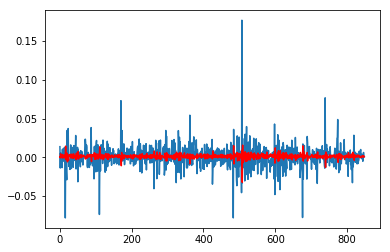

In [16]:
# forecasting using ARMA model
from sklearn.metrics import mean_squared_error
X = apple_return.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order = (1, 0, 1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color = 'red')

In [ ]:
# check the accuracy of correct prediction of signs